In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, accuracy_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostRegressor
import warnings
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassBalance, ClassificationReport, ConfusionMatrix, DiscriminationThreshold
from yellowbrick.features import JointPlotVisualizer, PCADecomposition, RadViz, Rank1D, Rank2D
from datetime import datetime
from vecstack import stacking
from scipy import stats
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
plt.rc("font", size=8)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", 
        color_codes=True, 
        font_scale = 2)
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
os.chdir('/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises')

In [37]:
data = pd.read_csv("/Users/patrickrs/Documents/GitLab/patrick-steiner/Exercises/data/data-breast-cancer.csv",
                  delimiter=',')

In [25]:
data['id'].is_unique # checking if id is unique

True

In [38]:
#Drop unused columns and move y to separate variable
data.set_index('id', inplace = True) # setting id column to row index 
data = data.drop('Unnamed: 32', 1)

In [39]:
 # replace M and B with boolean
y = data[['diagnosis']].replace(['B','M'],[0,1])
X = data.drop('diagnosis', 1)# drop id and diagnosis

X.head()
y.head()

,diagnosis
id,
842302,1
842517,1
84300903,1
84348301,1
84358402,1


In [124]:
# Specify the design matrix and the target vector for yellowbrick as arrays
design_matrix = X.values
target_vector = y.values.flatten()

In [125]:
# Stratified sampling based on the distribution of the target vector, y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = hold,
                                                    random_state = 30)

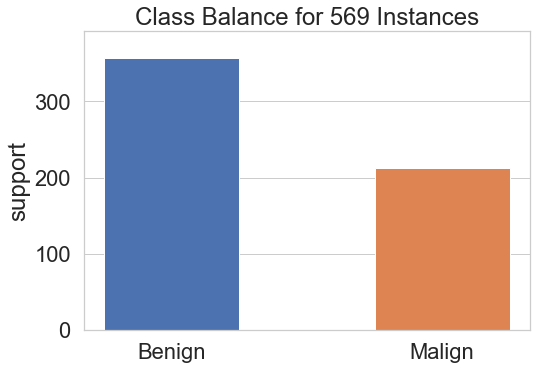

In [58]:

# Stage 1. Feature Analysers
feature_names = X.columns.tolist()
target_name = y.columns.tolist()


# Target balance
target_balance = ClassBalance(labels=['Benign', 'Malign'])
target_balance.fit(target_vector)
target_balance.show()

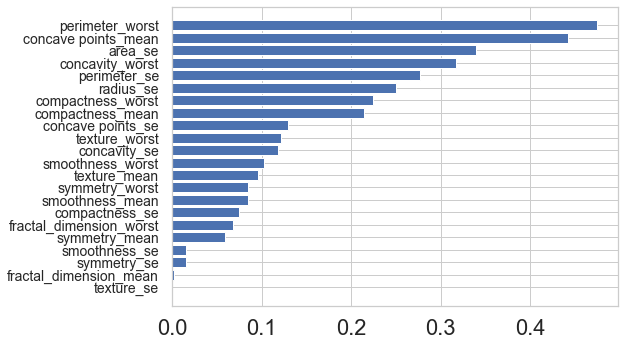

In [149]:

# Feature correlation (** requires dataframe and 1D target vector)
feature_correlation = FeatureCorrelation(method='mutual_info-classification',
                                         feature_names=feature_names, sort=True)
feature_correlation.fit(X, y.values.flatten())
for tick in feature_correlation.ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)



In [136]:
list(feature_correlation.ax.yaxis.)

[Text(0, 0.5, 'texture_se'),
 Text(0, 1.5, 'fractal_dimension_mean'),
 Text(0, 2.5, 'symmetry_se'),
 Text(0, 3.5, 'smoothness_se'),
 Text(0, 4.5, 'fractal_dimension_worst'),
 Text(0, 5.5, 'symmetry_mean'),
 Text(0, 6.5, 'compactness_se'),
 Text(0, 7.5, 'smoothness_mean'),
 Text(0, 8.5, 'symmetry_worst'),
 Text(0, 9.5, 'texture_mean'),
 Text(0, 10.5, 'smoothness_worst'),
 Text(0, 11.5, 'concavity_se'),
 Text(0, 12.5, 'texture_worst'),
 Text(0, 13.5, 'concave points_se'),
 Text(0, 14.5, 'compactness_mean'),
 Text(0, 15.5, 'compactness_worst'),
 Text(0, 16.5, 'radius_se'),
 Text(0, 17.5, 'perimeter_se'),
 Text(0, 18.5, 'concavity_worst'),
 Text(0, 19.5, 'area_se'),
 Text(0, 20.5, 'concave points_mean'),
 Text(0, 21.5, 'perimeter_worst')]

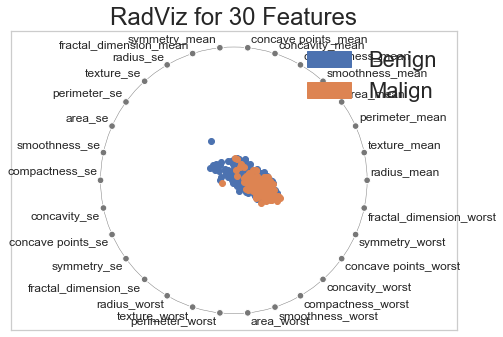

In [59]:

# Radviz
rad_viz = RadViz(classes=['Benign', 'Malign'], features=feature_names)
rad_viz.fit(design_matrix, target_vector)
for label in rad_viz.ax.texts:
    label.set_size(12)
rad_viz.show()

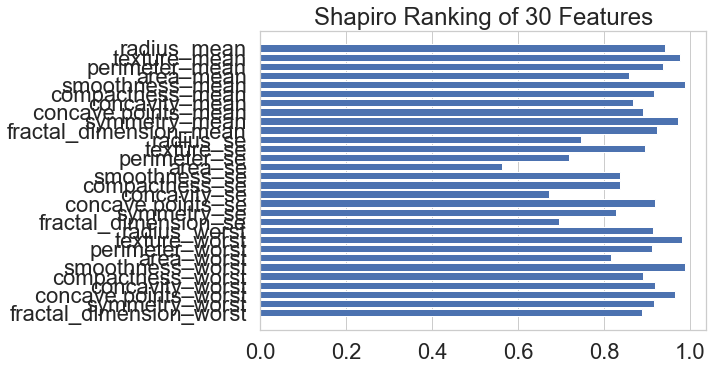

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [60]:
# 1D Rank
rank_1d = Rank1D(algorithm='shapiro', features=feature_names)
rank_1d.fit_transform_show(design_matrix, target_vector)

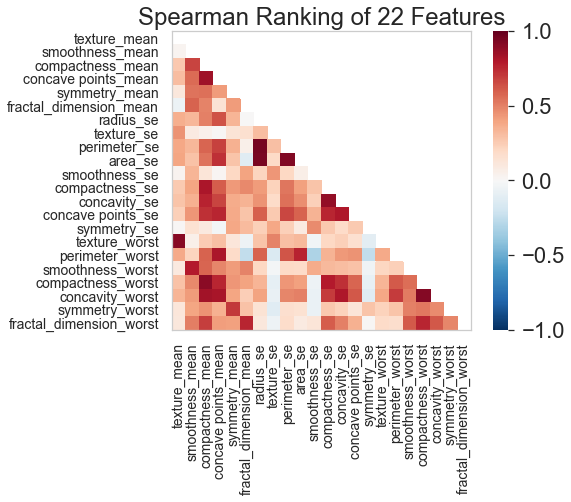

In [158]:
rank_2d = Rank2D(algorithm='spearman', features=feature_names)
for tick in rank_2d.ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in rank_2d.ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
rank_2d.fit_transform_show(design_matrix, target_vector);


In [114]:
# Based on the exploratory analysis the following can be excluded:
# radius_mean, area_mean, perimeter_mean, fractal_dimension_se 

#data = data.drop(['radius_mean', 'area_mean', 'perimeter_mean', 'fractal_dimension_se' 'area_worst',
#'concave points_worst', 'concavity_mean'], 1)

# replace M and B with boolean
y = data[['diagnosis']].replace(['B','M'],[0,1])
X = data.drop('diagnosis', 1)# drop id and diagnosis

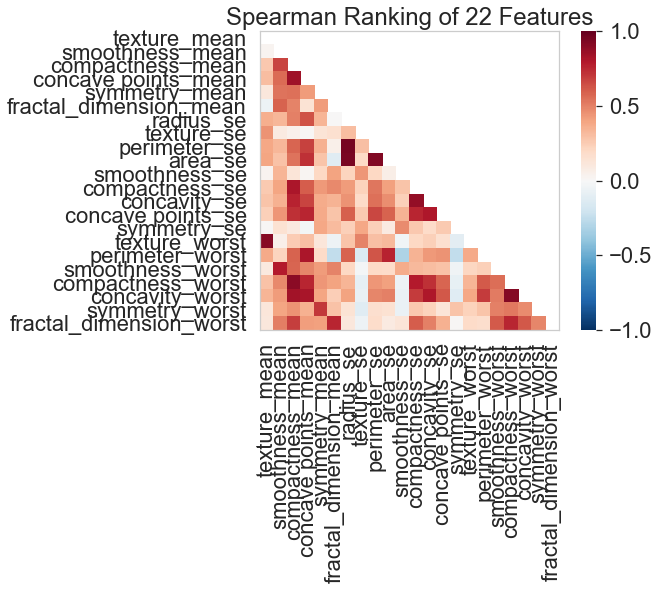

In [116]:
# Specify the design matrix and the target vector for yellowbrick as arrays
design_matrix = X.values
target_vector = y.values.flatten()

# Stage 1. Feature Analysers
feature_names = X.columns.tolist()
target_name = y.columns.tolist()

rank_2d = Rank2D(algorithm='spearman', features=feature_names)
rank_2d.fit_transform_show(design_matrix, target_vector);

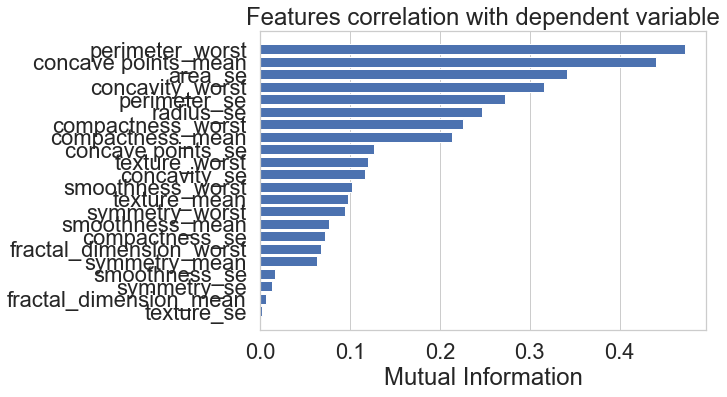

In [117]:
# Feature correlation (** requires dataframe and 1D target vector)
feature_correlation = FeatureCorrelation(method='mutual_info-classification',
                                         feature_names=feature_names, sort=True)
feature_correlation.fit(X, y.values.flatten())
for label in feature_correlation.ax.texts:
    label.set_size(10)
feature_correlation.show();

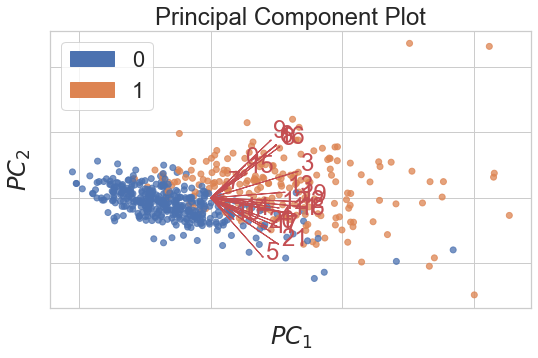

In [160]:
# PCA Projection
colors = np.array(['red' if yi else 'blue' for yi in target_vector])

pca = PCADecomposition(scale=True, proj_features=True)
pca.fit_transform_show(design_matrix, target_vector, colors=colors);

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [143]:
# Model Selection
models = [
    RandomForestClassifier(), 
    AdaBoostClassifier(),
    XGBClassifier(),
    XGBRFClassifier()
]

In [144]:
def training_cv_score_model(X, y, model):
    """
    This function takes the design matrix and target vector of the training set,
    along with a classification estimator and computes a 10 fold cross validated
    mean and standard deviation based on balanced accuracy.
    This score is printed to the end user.
    """
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    scores = cross_val_score(clf,
                             X,
                             y.values.flatten(),
                             scoring='balanced_accuracy',
                             cv=10)

    mean_score = scores.mean()
    avg_score = scores.std()

    model_name = clf.named_steps['classifier'].__class__.__name__

    print(f'{model_name}, Average Score : {mean_score} & Standard Deviation: {avg_score}')
    print('-'*90)

In [145]:
for model in models:
    training_cv_score_model(X, y, model)

RandomForestClassifier, Average Score : 0.9535569985569985 & Standard Deviation: 0.03733816843039069
------------------------------------------------------------------------------------------
AdaBoostClassifier, Average Score : 0.9674098124098123 & Standard Deviation: 0.02025838740071839
------------------------------------------------------------------------------------------
XGBClassifier, Average Score : 0.9563059163059163 & Standard Deviation: 0.02089067806029039
------------------------------------------------------------------------------------------
XGBRFClassifier, Average Score : 0.9440440115440116 & Standard Deviation: 0.03138749743383121
------------------------------------------------------------------------------------------


In [146]:
def out_of_sample_score(train_features, train_target, test_features, test_target, model):
    """
    This function takes the design matrix and target vector of the validation set,
    along with a classification estimator and
    scores the predicted classes and true values via a balanced accuracy score.
    This score is printed to the end user.
    """
    numeric_transformer = Pipeline(steps=[
        ('scale_x_num', StandardScaler())
    ])

    pre_processor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, feature_names)
    ])

    clf = Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('classifier', model)
    ])

    model_name = clf.named_steps['classifier'].__class__.__name__

    clf.fit(train_features, train_target.values.ravel())

    preds = clf.predict(test_features)
    score = balanced_accuracy_score(y_true=test_target, y_pred=preds)

    print(f'{model_name} with balanced accuracy on test set {score}')
    print('-'*90)

Adaboost was the best in in-sample predictor

In [147]:
for model in models:
    out_of_sample_score(X_train, y_train, X_test, y_test, model)

RandomForestClassifier with balanced accuracy on test set 0.9672619047619048
------------------------------------------------------------------------------------------
AdaBoostClassifier with balanced accuracy on test set 0.9672619047619048
------------------------------------------------------------------------------------------
XGBClassifier with balanced accuracy on test set 0.9623015873015872
------------------------------------------------------------------------------------------
XGBRFClassifier with balanced accuracy on test set 0.9742063492063492
------------------------------------------------------------------------------------------


In [163]:
# Feature Selection

In [166]:
data.dtypes

diagnosis                   object
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
texture_worst              float64
perimeter_worst            float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [167]:
 numeric_features = X.select_dtypes(include=['int64', 'float64']).columns 

In [183]:
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [199]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', LogisticRegression())
    ]
)

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Randomized Search

In [215]:
# specify parameters and distributions to sample from
params = [
    {
        'clf': [XGBClassifier()],   
        'clf__booster': ['gbtree', 'gblinear', 'dart'],
        'clf__learning_rate': stats.uniform(0, 20),
        'clf__min_split_loss': stats.uniform(0, 100),
        'clf__subsample': np.linspace(0,1,10,endpoint=False), #Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
        'clf__sampling_method': ['uniform', 'gradient_based'],
        'clf__colsample_bytree': stats.uniform(0, 10),
        'clf__colsample_bylevel': stats.uniform(0, 10),
        'clf__colsample_bynode': stats.uniform(0, 10),
        'clf__random_state': [42],
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': stats.uniform(0, 200),
        'clf__max_depth': stats.uniform(0, 20),
        'clf__random_state': [42],
    },
    {
        'clf': [AdaBoostClassifier()],
        'clf__n_estimators': stats.uniform(0, 200),
        'clf__learning_rate': stats.uniform(0, 1),
        'clf__random_state': [42],
    }
]

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(pipeline, 
                                   param_distributions = params,
                                   n_iter = n_iter_search
                                  )


random_search.fit(X, y)


/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'numpy.float64'>.

  FitFailedWarning)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFail

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numericals',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer_num',
                                                                                                SimpleImputer(add_indicator=False,
                                                                      

In [207]:
random_search.best_params_

{'clf': XGBClassifier(base_score=0.5, booster='gblinear',
               colsample_bylevel=6.762197532405052,
               colsample_bynode=3.954196232021517,
               colsample_bytree=7.384025281369343, gamma=0,
               learning_rate=12.034360539044364, max_delta_step=0, max_depth=3,
               min_child_weight=1, min_split_loss=93.212764612788, missing=None,
               n_estimators=100, n_jobs=1, nthread=None,
               objective='binary:logistic', random_state=42, reg_alpha=0,
               reg_lambda=1, sampling_method='gradient_based',
               scale_pos_weight=1, seed=None, silent=None, subsample=0.2,
               verbosity=1),
 'clf__booster': 'gblinear',
 'clf__colsample_bylevel': 6.762197532405052,
 'clf__colsample_bynode': 3.954196232021517,
 'clf__colsample_bytree': 7.384025281369343,
 'clf__learning_rate': 12.034360539044364,
 'clf__min_split_loss': 93.212764612788,
 'clf__random_state': 42,
 'clf__sampling_method': 'gradient_based',
 'c

In [219]:
random_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numericals',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer_num',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                   

Based on the results of the random search we can try the following with greid search:

In [220]:
params = [
    {
        'clf': [XGBClassifier()],   
        'clf__booster': ['gbtree', 'gblinear'],
        'clf__learning_rate': np.linspace(0,1,3,endpoint=False),
        'clf__min_split_loss': [0.01, 0.1, 1, 10, 100],
        'clf__subsample': np.linspace(0,1,3,endpoint=False), #Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
        'clf__sampling_method': ['uniform', 'gradient_based'],
        'clf__colsample_bytree': np.linspace(0,1,3,endpoint=False),
        'clf__colsample_bylevel': np.linspace(0,1,3,endpoint=False),
        'clf__colsample_bynode': np.linspace(0,1,3,endpoint=False),
        'clf__random_state': [42],
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [5, 50, 100, 250],
        'clf__max_depth': [5, 8, 10],
        'clf__random_state': [42],
    },
    {
        'clf': [AdaBoostClassifier()],
        'clf__n_estimators': [5, 50, 100, 250],
        'clf__learning_rate': np.linspace(0,1,3,endpoint=False),
        'clf__random_state': [42],
    }
]

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)
cv = GridSearchCV(pipeline, params, cv = rskf, scoring = ['f1', 'accuracy'], refit = 'f1', n_jobs = -1)
cv.fit(X_train, y_train)

print(f'Best F1-score: {cv.best_score_:.3f}\n')
print(f'Best parameter set: {cv.best_params_}\n')
print(f'Scores: {classification_report(y_train, cv.predict(X_train))}')

In [ ]:
preds = cv.predict(X_test)
print(f'Scores: {classification_report(y_holdout, preds)}\n')
print(f'F1-score: {f1_score(y_holdout, preds):.3f}')

### Let's try stacking up:

In [210]:
from vecstack import stacking

In [211]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           
                           regression = False, # False because it is a classiofication
     
                           mode = 'oof_pred_bag', 
       
                           needs_proba = False, #  Boolean indicating whether you need the probabilities of class labels
         
                           save_dir = None, # save the result to directory Boolean
            
                           metric = accuracy_score, 
    
                           n_folds = 4, 
                 
                           stratified = True,
            
                           shuffle = True,  
            
                           random_state = 0,    
         
                           verbose = 2) # 2 here refers to printing all info

/opt/anaconda3/envs/propulsion/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.96000000]
    fold  1:  [0.92000000]
    fold  2:  [0.95959596]
    fold  3:  [0.95959596]
    ----
    MEAN:     [0.94979798] + [0.01720466]
    FULL:     [0.94974874]

model  1:     [AdaBoostClassifier]
    fold  0:  [0.95000000]
    fold  1:  [0.93000000]
    fold  2:  [0.93939394]
    fold  3:  [0.95959596]
    ----
    MEAN:     [0.94474747] + [0.01111547]
    FULL:     [0.94472362]

model  2:     [XGBClassifier]
    fold  0:  [0.95000000]
    fold  1:  [0.94000000]
    fold  2:  [0.95959596]
    fold  3:  [0.94949495]
    ----
    MEAN:     [0.94977273] + [0.00693056]
    FULL:     [0.94974874]

model  3:     [XGBRFClassifier]
    fold  0:  [0.91000000]
    fold  1:  [0.91000000]
    fold  2:  [0.94949495]
    fold  3:  [0.93939394]
    ----
    MEAN:     [0.92722222] + [0.01758860]
    FULL:     [0

In [213]:
model = XGBClassifier(random_state=0, 
                      n_jobs=-1, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)


In [214]:
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.95906433]


[0.7]